In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

#load data
df = pd.read_csv("C:/Users/DEE/Desktop/kenya cpi analytics/data/raw/kenya_cpi_sample.csv")
df.head()




,Year,Month,Overall CPI,Food & Non-Alcoholic Beverages,Transport,"Housing, Water, Electricity, Gas & Fuels"
0,2023,1,130.2,140.2,120.5,110.2
1,2023,2,131.5,141.0,121.0,111.0
2,2023,3,132.0,142.5,121.8,111.8
3,2024,1,134.2,145.0,123.0,112.5
4,2024,2,135.1,146.2,124.1,113.0


In [14]:
# Convert Month and Year into a single date column
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# Sort by date
df = df.sort_values('Date')

# Drop duplicates
df = df.drop_duplicates()

df.head()


,Year,Month,Overall CPI,Food & Non-Alcoholic Beverages,Transport,"Housing, Water, Electricity, Gas & Fuels",Date
0,2023,1,130.2,140.2,120.5,110.2,2023-01-01
1,2023,2,131.5,141.0,121.0,111.0,2023-02-01
2,2023,3,132.0,142.5,121.8,111.8,2023-03-01
3,2024,1,134.2,145.0,123.0,112.5,2024-01-01
4,2024,2,135.1,146.2,124.1,113.0,2024-02-01


In [20]:
df.to_csv("cpi_cleaned", index=True)
print("saved")


saved


In [21]:
df.describe(include='all')

,Year,Month,Overall CPI,Food & Non-Alcoholic Beverages,Transport,"Housing, Water, Electricity, Gas & Fuels",Date
count,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5
mean,2023.400000,1.80000,132.600000,142.980000,122.080000,111.700000,2023-06-20 04:48:00
min,2023.000000,1.00000,130.200000,140.200000,120.500000,110.200000,2023-01-01 00:00:00
25%,2023.000000,1.00000,131.500000,141.000000,121.000000,111.000000,2023-02-01 00:00:00
50%,2023.000000,2.00000,132.000000,142.500000,121.800000,111.800000,2023-03-01 00:00:00
75%,2024.000000,2.00000,134.200000,145.000000,123.000000,112.500000,2024-01-01 00:00:00
max,2024.000000,3.00000,135.100000,146.200000,124.100000,113.000000,2024-02-01 00:00:00
std,0.547723,0.83666,2.008731,2.565541,1.472073,1.126943,NaN


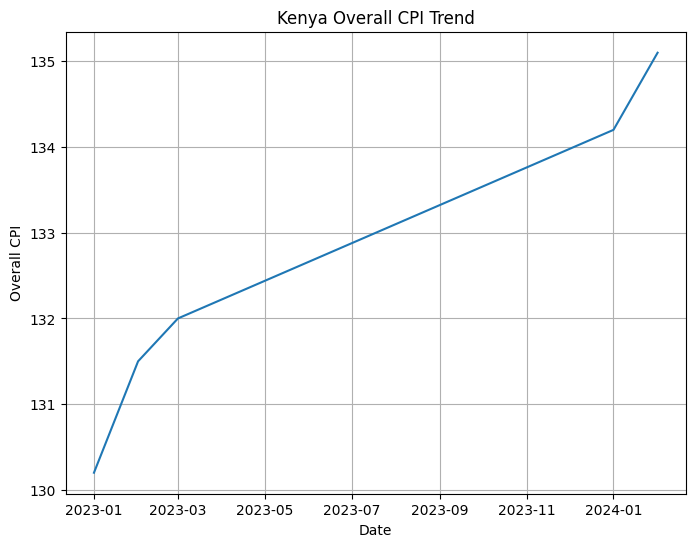

In [27]:
plt.figure(figsize=(8,6))
plt.plot(df["Date"],df["Overall CPI"])
plt.title("Kenya Overall CPI Trend")
plt.xlabel("Date")
plt.ylabel("Overall CPI")
plt.grid(True)
plt.show()
           

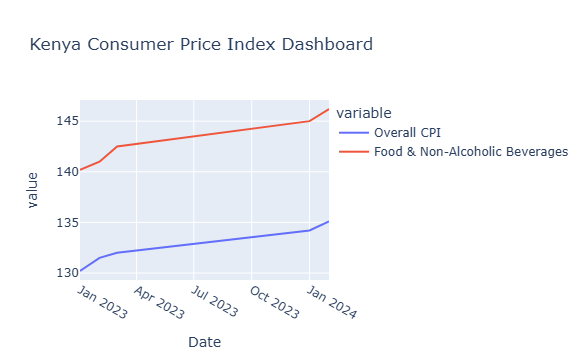

In [29]:
fig=px.line(df,x="Date",y=["Overall CPI", "Food & Non-Alcoholic Beverages"],title="Kenya Consumer Price Index Dashboard")
fig.write_html("cpi_dashboard.html")
fig.show()